# Scraped review cleaning and statistics

1. Check duplicates and remove duplicates.
2. Filter English reviews only.
3. Statistical data on reviews for each book (to metadata file).
4. Review statistics. 

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# import nltk

## Remove Duplicates

In [2]:
def remove_duplicates(file_path):
    if os.stat(file_path).st_size == 0:
        print(f"{file_path} is empty")
        return
    
    df = pd.read_csv(file_path)

    if df.empty:
        print(f"{file_path} is empty")
        return
    
    cleaned_df = df.drop_duplicates(subset=['user_name','text'], ignore_index=True)
    cleaned_df.to_csv(file_path, index=False, mode='w')

In [3]:
def process_all_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            remove_duplicates(file_path)
            print(f"Processed {filename}")

In [10]:
review_path = "../Data/Reviews_Scraped/Raw"
process_all_files(review_path)

Processed 10041326-baby-s-in-black_reviews.csv
Processed 101136053-the-golden-voice_reviews.csv
Processed 10401677-kiki-de-montparnasse_reviews.csv
Processed 10860500-the-adventures-of-herg_reviews.csv
Processed 10991383-grace_reviews.csv
Processed 12179682-castro_reviews.csv
Processed 122649245-golden-boys_reviews.csv
Processed 123208777-through-clouds-of-smoke_reviews.csv
Processed 125078769-toussaint-louverture_reviews.csv
Processed 125120657-i-am-stan_reviews.csv
Processed 125877100-erdo-an_reviews.csv
Processed 126121384-queen-in-comics_reviews.csv
Processed 130006691-hockney_reviews.csv
Processed 13064246-hellraisers_reviews.csv
Processed 13237047-leon-trotsky_reviews.csv
Processed 13332696-my-friend-dahmer_reviews.csv
Processed 14475543-the-hypo_reviews.csv
Processed 15792872-feynman_reviews.csv
Processed 16059564-trinity_reviews.csv
Processed 16284969-masks-of-anarchy_reviews.csv
Processed 16678351-superzelda_reviews.csv
Processed 17287065-woman-rebel_reviews.csv
Processed 1734

In [4]:
filtered_path = "../Data/Reviews_Scraped/Filtered/"
metadata_path = "../Data/Goodreads_Comics_Data/Data_Files/Masterdata_ongoing.xlsx"
metadata = pd.read_excel(metadata_path, sheet_name="BOOK_SHEET")
goodreads_id = metadata['goodreads_id'].tolist()

In [6]:
collected_reviews = [f for f in os.listdir(filtered_path) if f.endswith('.csv')]
collected_ids = [f.split('_reviews.csv')[0] for f in collected_reviews]

missing_ids = list(set(goodreads_id) - set(collected_ids))
missing_ids

# After double checking, the missing_ids are the book with no reviews. 

['59113162-one-bourbon-one-scotch-one-beer',
 '57553105-cypress-hill-tres-equis',
 '49930973-clayton',
 '63234758-growing-up-farley-a-chris-farley-story']

In [9]:
def get_scraped_review_num(filepath):
    df = pd.read_csv(filepath)
    return len(df)

# files = ["17346698-march", "29436571-march", "52211831-they-called-us-enemy", "22487952-march"]
# files = ["52211831-they-called-us-enemy"]

# for file in files:
    # print(get_scraped_review_num(f"../../Data/Reviews_Scraped/Filtered/{file}_reviews.csv"))

4950


**Unscraped**

63234758-growing-up-farley-a-chris-farley-story: no reviews

57553105-cypress-hill-tres-equis: 0 reviews

49930973-clayton: 0 reviews

59113162-one-bourbon-one-scotch-one-beer: 0 reviews

**Unfinished scraping**

17346698-march: 5965 reviews, 5038 scraped

52211831-they-called-us-enemy: 6449 reviews, 4950 scraped

## Filter English reviews only

Package dependency: fasttext

Package choice according to the accuracy reported in: https://github.com/pemistahl/lingua-py 

In [13]:
import fasttext

In [15]:
model = fasttext.load_model("../../lid.176.bin")

In [21]:
text = "This is a test sentence"
print(model.predict(text))
print(type(model.predict(text)))
print(len(model.predict(text)))

(('__label__en',), array([0.97044605]))
<class 'tuple'>
2


In [20]:
def detect_language(text):
    return model.predict(text)[0][0].split("__label__")[1]

In [25]:
filtered_path = "../Data/Reviews_Scraped/Filtered/"
en_path = "../Data/Reviews_Scraped/En/"

reviews = [f for f in os.listdir(filtered_path) if f.endswith('.csv')]
for file in reviews:
    df = pd.read_csv(os.path.join(filtered_path, file))
    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].replace('\n',' ', regex=True)
    df['lang'] = df['text'].apply(detect_language)
    df = df[df['lang'] == 'en']
    df.to_csv(os.path.join(en_path, file), index=False, mode='w')
    print(f"Processed {file}")

Processed 61783881-frida-kahlo_reviews.csv
Processed 50653505-charlotte-salomon_reviews.csv
Processed 61047526-tangier-in-the-rain_reviews.csv
Processed 54017867-hawking_reviews.csv
Processed 28943758-pocahontas_reviews.csv
Processed 60680224-tokyo-rose---zero-hour_reviews.csv
Processed 45708322-michael-jackson-m-sica-de-luz-vida-de-sombras-michael-jackson-music_reviews.csv
Processed 61363155-we-re-all-just-fine_reviews.csv
Processed 10860500-the-adventures-of-herg_reviews.csv
Processed 28818236-the-trial-of-roger-casement_reviews.csv
Processed 60317104-francis-bacon-graphic-novel_reviews.csv
Processed 59551313-golden-boy_reviews.csv
Processed 50915243-siberian-haiku_reviews.csv
Processed 38471793-h-p-lovecraft_reviews.csv
Processed 50891560-for-justice_reviews.csv
Processed 27219916-marie-antoinette-phantom-queen_reviews.csv
Processed 40186431-weegee_reviews.csv
Processed 16059564-trinity_reviews.csv
Processed 61964721-lugosi_reviews.csv
Processed 25073670-will-eisner_reviews.csv
Proc

In [27]:
filtered_list = [f for f in os.listdir(filtered_path) if f.endswith('.csv')]
en_list = [f for f in os.listdir(en_path) if f.endswith('.csv')]
print(f"Filtered: {len(filtered_list)}")
print(f"English: {len(en_list)}")

Filtered: 224
English: 224


## Review number statistics

### Review number & English review number

In [28]:
# Review distribution (before & after removed other languages)

def cal_review_num(file_path):
    df = pd.read_csv(file_path)
    return len(df)

filtered_path = "../Data/Reviews_Scraped/Filtered/"
en_path = "../Data/Reviews_Scraped/En/"
metadata_path = "../Data/Goodreads_Comics_Data/Data_Files/Masterdata_ongoing.xlsx"
metadata = pd.read_excel(metadata_path, sheet_name="BOOK_SHEET")

collected_list = [f for f in os.listdir(filtered_path) if f.endswith('.csv')]

review_num_df = pd.DataFrame(columns=['book_id','goodreads_id', 'review_num', 'review_num_en'])
review_num_df['book_id'] = metadata['book_id']
review_num_df['goodreads_id'] = metadata['goodreads_id']

for i in review_num_df['goodreads_id']:
    if f"{i}_reviews.csv" in collected_list:
        review_num_df.loc[review_num_df['goodreads_id'] == i, 'review_num'] = cal_review_num(f"{filtered_path}{i}_reviews.csv")
        review_num_df.loc[review_num_df['goodreads_id'] == i, 'review_num_en'] = cal_review_num(f"{en_path}{i}_reviews.csv")
    else:
        review_num_df.loc[review_num_df['goodreads_id'] == i, 'review_num'] = 0
        review_num_df.loc[review_num_df['goodreads_id'] == i, 'review_num_en'] = 0

review_num_df

,book_id,goodreads_id,review_num,review_num_en
0,1,27132988-thoreau,79,58
1,2,41219524-the-rolling-stones-in-comics,28,26
2,3,36258390-the-provocative-colette,72,61
3,4,39830625-the-beatles-in-comics,62,46
4,5,32713786-sartre,48,35
...,...,...,...,...
223,224,57455011-artemisia,69,32
224,225,55554047-billie-holiday,18,18
225,226,130006691-hockney,7,7
226,227,182761382-andy-warhol,70,68


In [29]:
df = review_num_df[["book_id", "review_num", "review_num_en"]]

with pd.ExcelWriter(metadata_path, mode='a', engine='openpyxl', if_sheet_exists='new') as writer:
    df.to_excel(writer, sheet_name="BOOK_REVIEW_SHEET", index=False)

In [44]:
review_num_df["review_num"] = pd.to_numeric(review_num_df["review_num"], errors='coerce')
review_num_df["review_num_en"] = pd.to_numeric(review_num_df["review_num_en"], errors='coerce')

review_num_df[["review_num", "review_num_en"]].describe().round(2)

,review_num,review_num_en
count,228.00,228.00
mean,186.22,163.21
std,601.75,580.60
min,0.00,0.00
25%,19.00,15.00
50%,51.50,35.50
75%,127.50,98.25
max,5038.00,4960.00


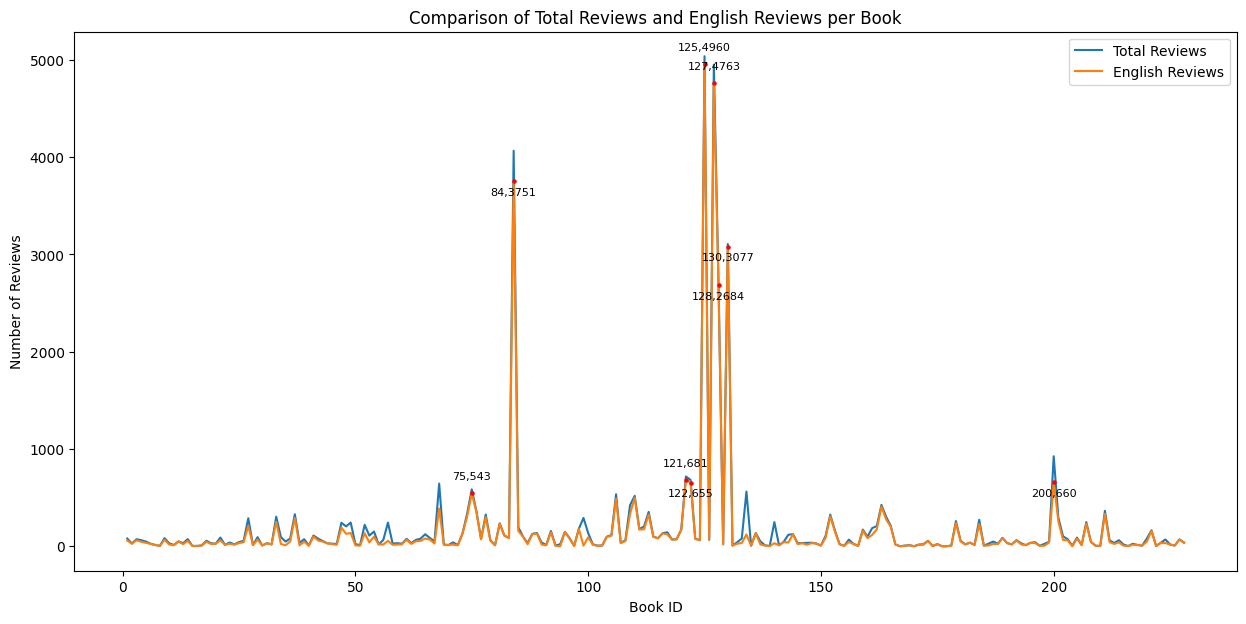

In [57]:
# Comparison of Total Reviews and English Reviews per Book

x = review_num_df['book_id']
y_total = review_num_df['review_num']
y_en = review_num_df['review_num_en']

plt.figure(figsize=(15, 7))

plt.plot(x, y_total, label='Total Reviews')
plt.plot(x, y_en, label='English Reviews')

for i in range(len(y_en)):
    if y_en[i] > 500:
        offset = 10 if i % 2 == 0 else -10  # adjust the position of the text
        plt.annotate(f'{x[i]},{y_en[i]}', (x[i], y_en[i]), textcoords="offset points", xytext=(0, offset), ha='center', fontsize=8)
        plt.scatter(x[i], y_en[i], color='red', s=5, zorder=3)  # mark the point red

plt.xlabel('Book ID')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Total Reviews and English Reviews per Book')
plt.legend()
plt.show()

In [56]:
# total review num

print(f"Total reviews scraped: {sum(y_total)}")
print(f"Total English reviews: {sum(y_en)}")

Total reviews scraped: 42459
Total English reviews: 37212


### Review word number

Calculate the word number for **English reviews only**. 

In [76]:
import nltk
import string
import emoji
import re
import unicodedata
from collections import defaultdict

In [72]:
# Identify uncommon characters

def find_unusual_chars(text):
    return common_char_pattern.findall(text)

common_char_pattern = re.compile(r'[^a-zA-Z0-9\s.,!?\'\"-]')

unusual_chars = []

for file in collected_list:
    df = pd.read_csv(os.path.join(en_path, file))
    for text in df['text']:
        unusual_chars.extend(find_unusual_chars(text))

unusual_chars = set(unusual_chars)
print(unusual_chars)

{'ד', 'в', '%', '☽', 'ï', '•', '́', '\U0001faf6', '🤦', '=', '🤣', 'ै', '\u200d', 'ツ', 'ä', 'อ', 'ό', 'ó', 'ê', '⚧', 'Ф', '😝', '#', 'म', 'α', 'ë', '😂', '🎨', '𝒹', '💙', '👁', '💛', '😡', 'à', 'ए', '🏿', 'Ō', 'ц', 'о', '™', '😣', '🙌', '⚢', '𝙫', 'र', '\U0001fae1', 'ú', '摸', '🙄', '🧠', 'व', '𝓃', '⅗', 'ि', '📷', '💖', '\U0001fa75', '\U0001fa77', '📘', 'ç', '𝙚', 'å', '🥰', 'ž', '𝙞', '身', 'ş', '🎸', ';', '𝒞', '手', 'ö', '☹', '🌟', '🥲', '𝙪', '𝙝', '世', 'й', '🤷', 'ь', '|', '′', '💀', 'ื', '🙇', '😃', 'ं', '🙂', '👏', 'े', 'ă', '国', '👨', '👊', 'П', 'स', '🛳', '½', 'श', '{', '🏽', '👋', '💕', 'ห', '\\', '😢', '搜', 'ü', '„', '𝑒', '´', '的', '𝘪', 'א', '\U0001f979', '🍏', '😑', '🌷', 'ю', '𝙩', '¯', 'х', '😜', '꙳', '…', '»', 'क', '°', 'し', '🍎', 'ć', '✍', 'Ö', '🏳', '⅘', '🤘', '🤩', '😭', '｡', '\U0001fae4', '𝒶', '🌞', '“', '😊', ']', '💪', '\u2063', 'ा', '🛋', 'É', '˚', '💗', '𝙤', '😒', '𝙙', 'р', 'ñ', '✶', '𝙢', '🌹', '我', '者', '❞', 'ह', '𝙣', ')', '🕺', '🌘', 'ो', '‚', '(', '𝘯', '衣', '▶', '🎃', '🏓', '▫', '💞', '😬', '�', '慢', 'с', '😓', '/', '🥴', '😲',

In [77]:
category_dict = defaultdict(set)

for char in unusual_chars:
    category = unicodedata.category(char)
    category_dict[category].add(char)

for category, chars in category_dict.items():
    print(f"Category: {category} -> {chars}")

Category: Lo -> {'摸', 'ד', '下', 'स', '手', 'さ', 'व', 'म', '衣', 'כ', 'श', 'ด', '世', '三', 'น', 'י', 'ग', '慢', 'प', 'な', 'क', '美', 'ए', 'し', 'ห', 'ב', 'ו', 'द', '检', '查', '搜', 'य', 'ส', '服', 'ツ', '上', 'อ', '的', 'א', 'ब', '我', '被', 'ง', '者', 'い', 'ह', 'र', '用', '国', 'न', '身'}
Category: Ll -> {'в', 'â', 'ï', 'у', 'κ', 'ė', '𝙖', '𝙧', 'ü', '𝑒', '𝙛', 'ä', '𝙘', 'ø', 'ό', '𝘪', 'п', 'ó', '𝙡', 'т', 'е', 'ê', 'ì', 'н', 'ю', '𝙩', 'к', 'μ', 'α', 'ë', 'х', '𝒹', 'í', 'š', 'à', '𝙮', 'ć', '𝒽', '𝘵', 'ц', 'ς', 'о', 'ô', 'έ', '𝙫', '𝒶', 'ú', '𝑔', 'ν', 'ι', 'ő', 'ł', 'и', '𝙬', '𝓃', '𝙤', '𝙙', 'р', 'ñ', 'ō', 'ç', '𝙢', '𝙚', 'å', 'ž', '𝙞', 'é', '𝓇', '𝙣', 'л', 'ş', 'я', 'ö', '𝘳', 'ż', '𝘯', '𝙪', 'è', '𝙝', 'й', 'ù', '𝙥', 'ь', 'с', 'а', 'і', '𝘺', 'á', '𝙨', 'î', 'ă', 'ã', '𝓁', 'û'}
Category: Po -> {';', '、', '%', '•', '#', '꙳', '″', '…', '：', '/', '¶', ':', '′', '*', '@', '\\', '･', '｡', '‧', '&'}
Category: So -> {'👨', '👊', '🇽', '★', '😍', '☽', '😆', '☆', '🛳', '✅', '🧐', '😠', '💩', '🤦', '😫', '♥', '👋', '🇲', '🤣', '😮', '😋', '

In [88]:
# Unicode categories that should be kept: Ll

cat_to_rm = category_dict.keys() - {'Ll'}
chars_to_rm = []

for key, value in category_dict.items():
    if key in cat_to_rm:
        chars_to_rm.extend(value)

chars_to_rm = ''.join(re.escape(char) for char in chars_to_rm)  # handle special characters in chars_to_rm for regex
pattern = re.compile(f"[{chars_to_rm}]")  # create a pattern to remove all characters in chars_to_rm

In [96]:
def clean_review(review):
    cleaned_review = pattern.sub('', review)
    return cleaned_review

In [97]:
def count_words(review):
    tokenizer = nltk.TweetTokenizer() #TweetTokenizer can identify words like "can't" as a single word
    words =tokenizer.tokenize(review)
    words = [word for word in words if word not in string.punctuation]

    return len(words)

In [94]:
# test test

review = "‪Very informative, well written, and interesting art style. "
count_words(review)

8

In [98]:
for file in collected_list:
    df = pd.read_csv(os.path.join(en_path, file))
    df["text"] = df["text"].apply(clean_review)
    df["word_count"] = df["text"].apply(count_words)
    df.to_csv(os.path.join(en_path, file), index=False, mode='w')
    print(f"Processed {file}")

Processed 61783881-frida-kahlo_reviews.csv
Processed 50653505-charlotte-salomon_reviews.csv
Processed 61047526-tangier-in-the-rain_reviews.csv
Processed 54017867-hawking_reviews.csv
Processed 28943758-pocahontas_reviews.csv
Processed 60680224-tokyo-rose---zero-hour_reviews.csv
Processed 45708322-michael-jackson-m-sica-de-luz-vida-de-sombras-michael-jackson-music_reviews.csv
Processed 61363155-we-re-all-just-fine_reviews.csv
Processed 10860500-the-adventures-of-herg_reviews.csv
Processed 28818236-the-trial-of-roger-casement_reviews.csv
Processed 60317104-francis-bacon-graphic-novel_reviews.csv
Processed 59551313-golden-boy_reviews.csv
Processed 50915243-siberian-haiku_reviews.csv
Processed 38471793-h-p-lovecraft_reviews.csv
Processed 50891560-for-justice_reviews.csv
Processed 27219916-marie-antoinette-phantom-queen_reviews.csv
Processed 40186431-weegee_reviews.csv
Processed 16059564-trinity_reviews.csv
Processed 61964721-lugosi_reviews.csv
Processed 25073670-will-eisner_reviews.csv
Proc

In [100]:
review_word_count = 0
for file in collected_list:
    df = pd.read_csv(os.path.join(en_path, file))
    review_word_count += df["word_count"].sum()

print(f"Total word count: {review_word_count}")

Total word count: 3467963


In [102]:
avg_review_len = review_word_count / sum(review_num_df["review_num_en"])
print(f"Average review length: {avg_review_len:.2f} words")

Average review length: 93.19 words
